`Import Libraries & Read Data`

Data from https://data.humdata.org/dataset/wfp-food-prices-for-nigeria 

GeoJSON data from https://marcusmatthias.carto.com/tables/nigeria_geojson/public/map

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore", message="Ignoring `palette` because no `hue` variable has been assigned.")

In [3]:
# Load the data
df = pd.read_csv('data/wfp_food_prices_nga.csv', low_memory=False, skiprows=[1])
df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5398
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3145
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.70,3.1396
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3620
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.080000,7.240000,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68481,2024-03-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Onions,0.5 KG,aggregate,Retail,NGN,200.00,0.1242
68482,2024-03-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Oranges,400 G,aggregate,Retail,NGN,200.00,0.1242
68483,2024-03-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Spinach,300 G,aggregate,Retail,NGN,50.00,0.0311
68484,2024-03-15,Yobe,Yusufari,Yusufari,13.062665,11.171371,vegetables and fruits,Tomatoes,0.5 KG,aggregate,Retail,NGN,50.00,0.0311


In [4]:
# Drop unneeded columns
columns_to_drop = ['admin2', 'latitude', 'longitude', 'unit', 'priceflag', 'pricetype', 'currency']
df = df.drop(columns=columns_to_drop)
df = df.rename(columns={'admin1': 'state'})
df

,date,state,market,category,commodity,price,usdprice
0,2002-01-15,Katsina,Jibia (CBM),cereals and tubers,Maize,175.92,1.5398
1,2002-01-15,Katsina,Jibia (CBM),cereals and tubers,Millet,150.18,1.3145
2,2002-01-15,Katsina,Jibia (CBM),cereals and tubers,Rice (imported),358.70,3.1396
3,2002-01-15,Katsina,Jibia (CBM),cereals and tubers,Sorghum,155.61,1.3620
4,2002-01-15,Katsina,Jibia (CBM),pulses and nuts,Beans (niebe),196.87,1.7231
...,...,...,...,...,...,...,...
68481,2024-03-15,Yobe,Yusufari,vegetables and fruits,Onions,200.00,0.1242
68482,2024-03-15,Yobe,Yusufari,vegetables and fruits,Oranges,200.00,0.1242
68483,2024-03-15,Yobe,Yusufari,vegetables and fruits,Spinach,50.00,0.0311
68484,2024-03-15,Yobe,Yusufari,vegetables and fruits,Tomatoes,50.00,0.0311


In [5]:
# Convert 'date' to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.dropna(subset=['state', 'category', 'price', 'usdprice'])
df

,date,state,market,category,commodity,price,usdprice,year
0,2002-01-15,Katsina,Jibia (CBM),cereals and tubers,Maize,175.92,1.5398,2002
1,2002-01-15,Katsina,Jibia (CBM),cereals and tubers,Millet,150.18,1.3145,2002
2,2002-01-15,Katsina,Jibia (CBM),cereals and tubers,Rice (imported),358.70,3.1396,2002
3,2002-01-15,Katsina,Jibia (CBM),cereals and tubers,Sorghum,155.61,1.3620,2002
4,2002-01-15,Katsina,Jibia (CBM),pulses and nuts,Beans (niebe),196.87,1.7231,2002
...,...,...,...,...,...,...,...,...
68481,2024-03-15,Yobe,Yusufari,vegetables and fruits,Onions,200.00,0.1242,2024
68482,2024-03-15,Yobe,Yusufari,vegetables and fruits,Oranges,200.00,0.1242,2024
68483,2024-03-15,Yobe,Yusufari,vegetables and fruits,Spinach,50.00,0.0311,2024
68484,2024-03-15,Yobe,Yusufari,vegetables and fruits,Tomatoes,50.00,0.0311,2024


In [6]:
# Group by state, year, and category and calculate average prices
category_avg_price_df = df.groupby(['state', 'year', 'category']).agg(
    avgprice=('price', 'mean'), 
    avgusdprice=('usdprice', 'mean')
).reset_index()

category_avg_price_df

,state,year,category,avgprice,avgusdprice
0,Abia,2014,cereals and tubers,121.618030,0.736017
1,Abia,2014,non-food,128.500000,0.778400
2,Abia,2014,oil and fats,4000.000000,24.230467
3,Abia,2014,pulses and nuts,213.035000,1.288067
4,Abia,2015,cereals and tubers,138.761894,0.717880
...,...,...,...,...,...
634,Zamfara,2022,pulses and nuts,24499.481528,57.962450
635,Zamfara,2023,cereals and tubers,13900.814286,30.171557
636,Zamfara,2023,non-food,619.000000,1.343550
637,Zamfara,2023,oil and fats,981.330000,2.130000


`Average Price Trend for Each Category Over the Years`

<Figure size 1200x600 with 0 Axes>

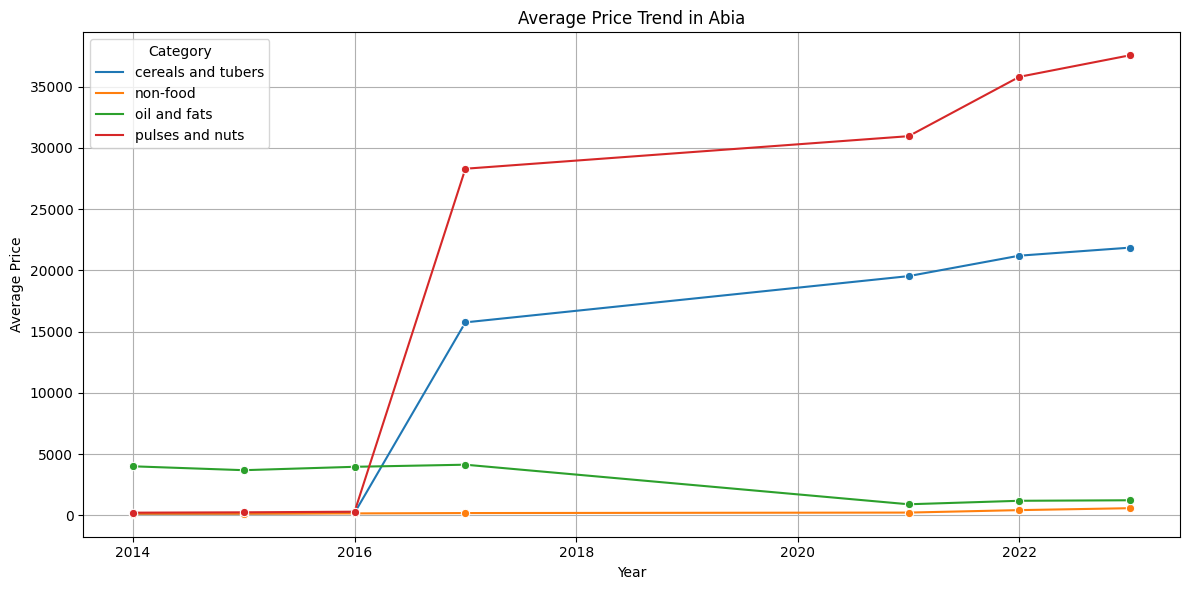

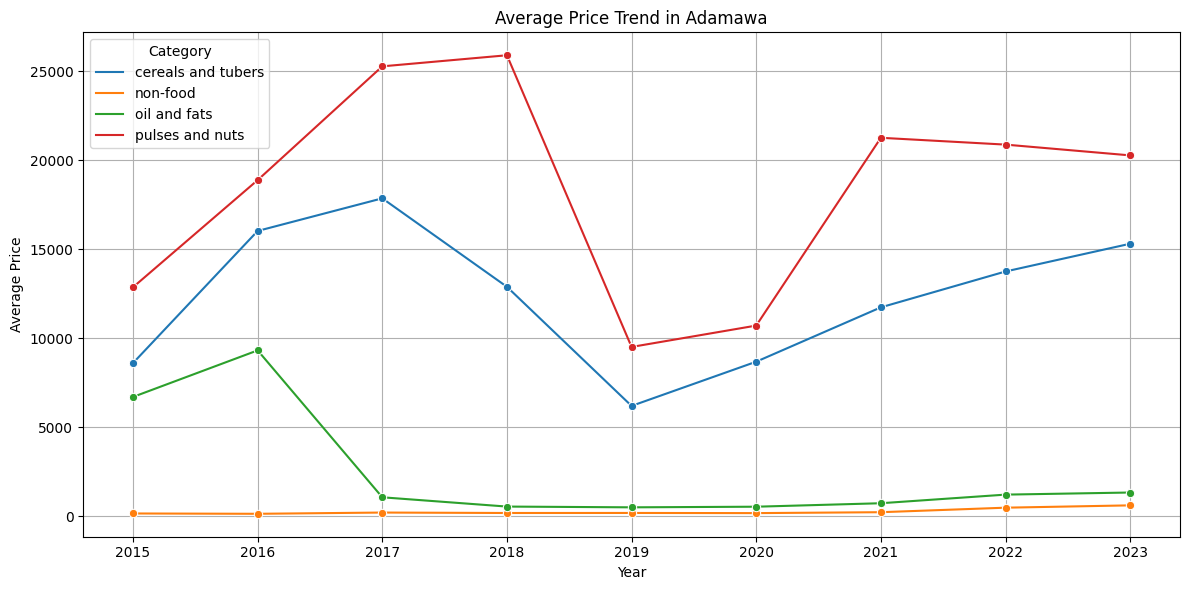

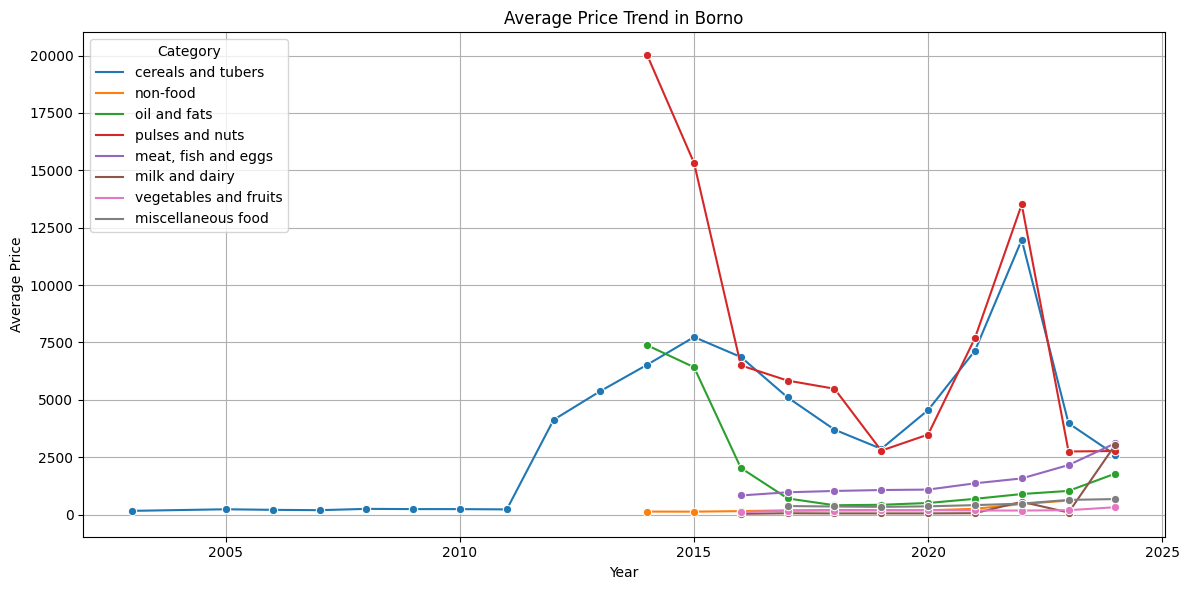

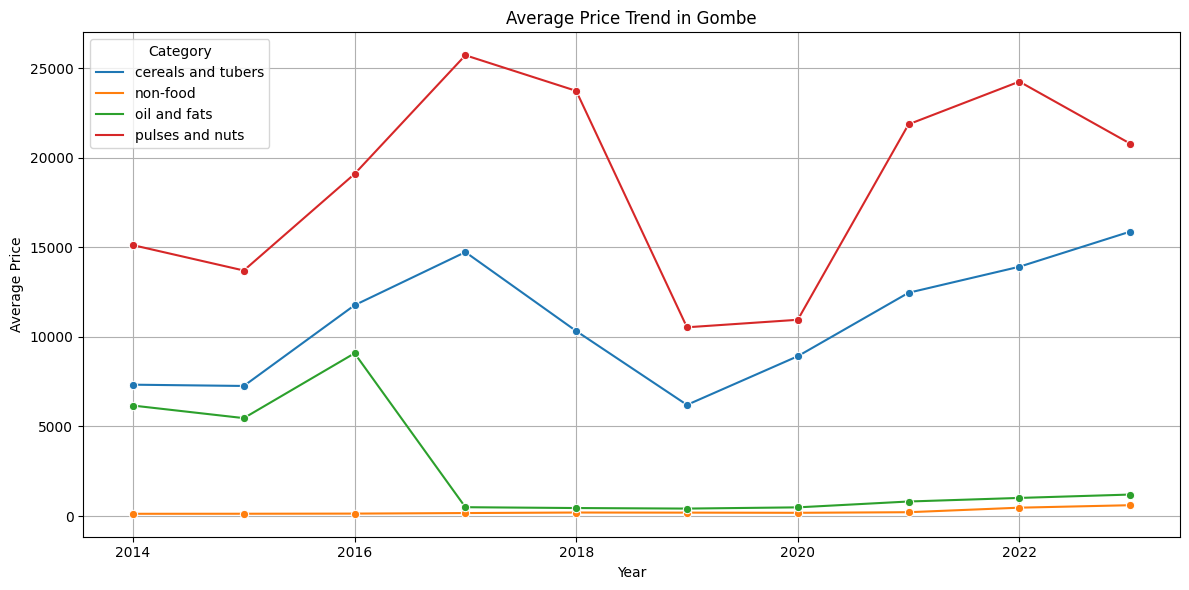

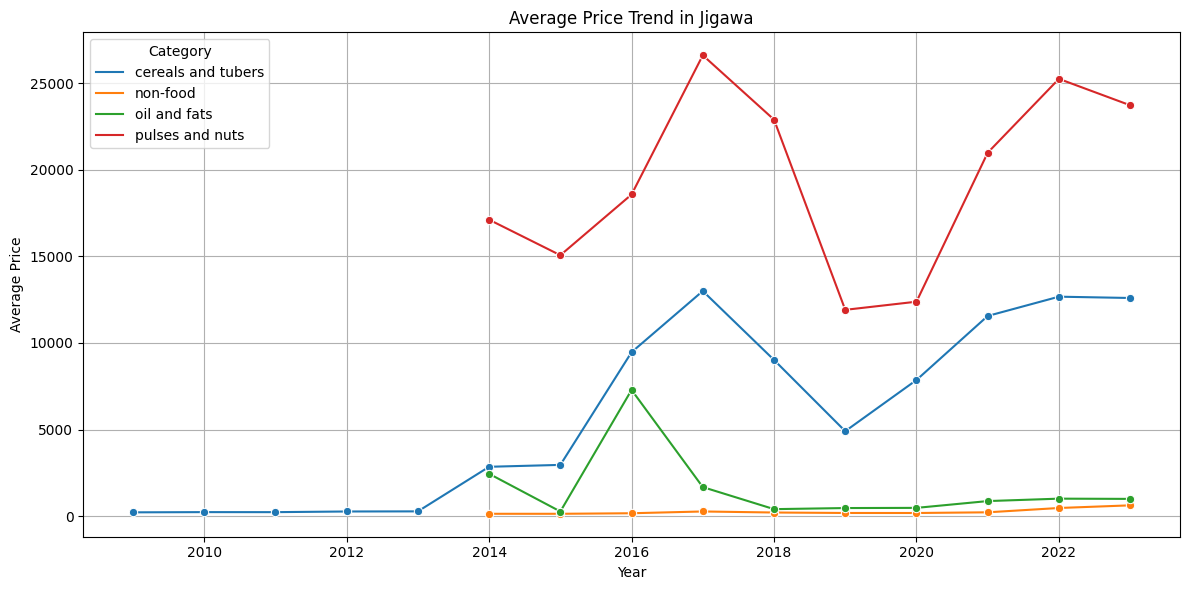

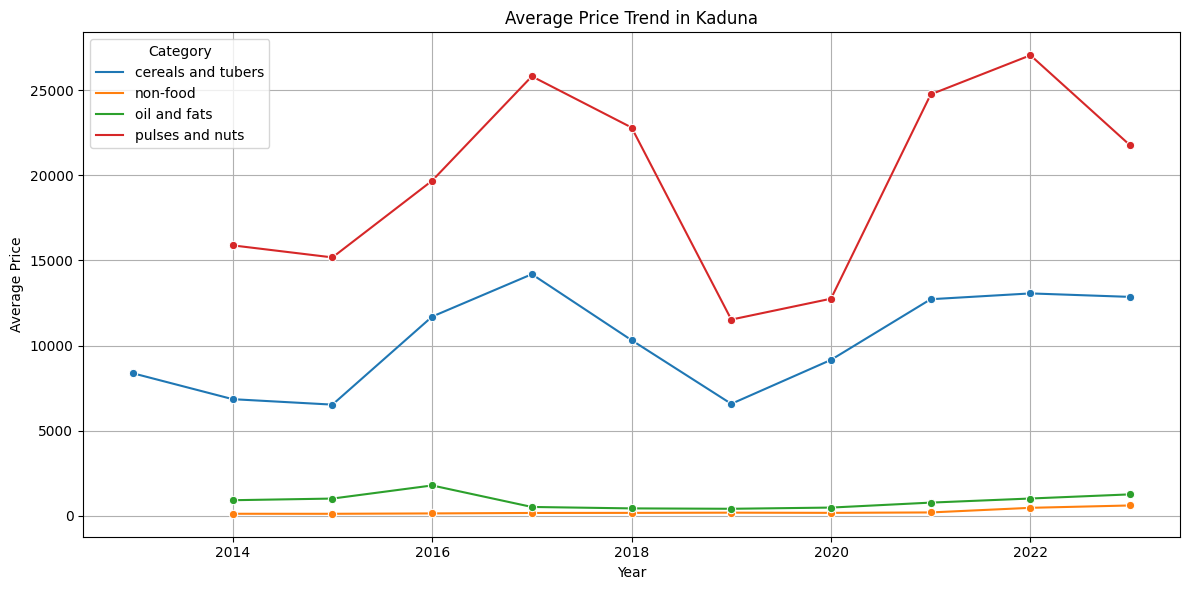

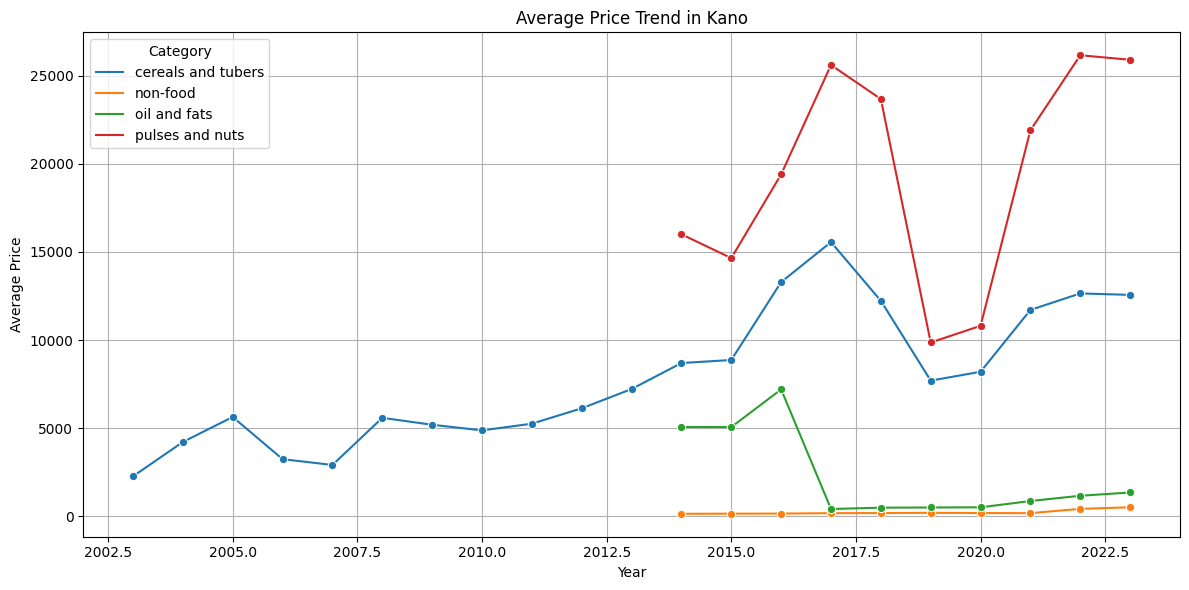

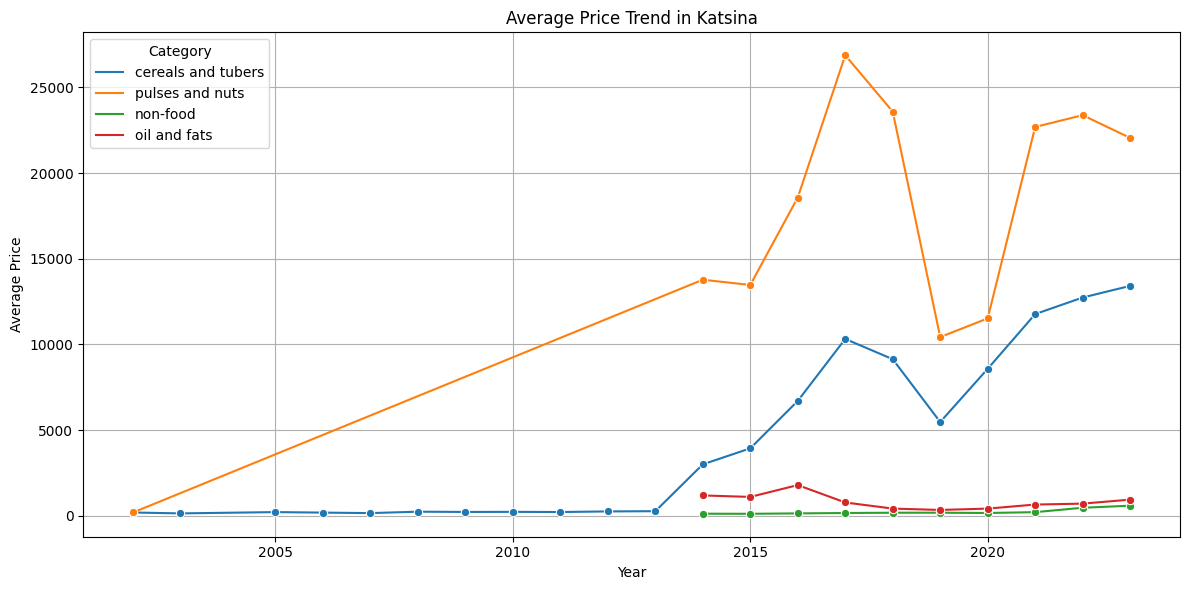

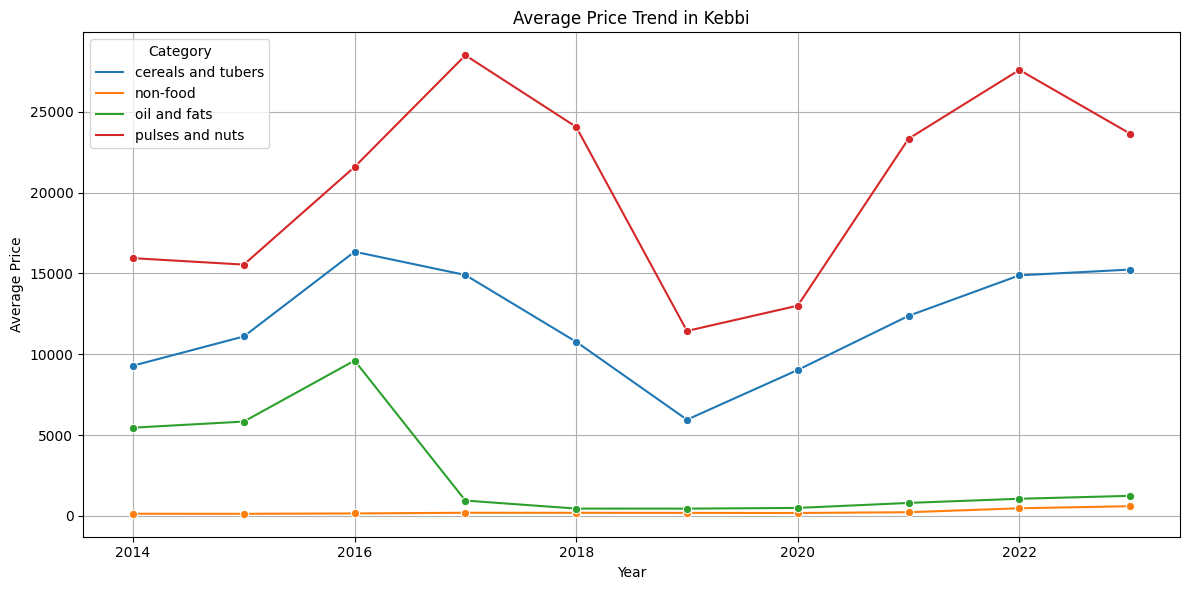

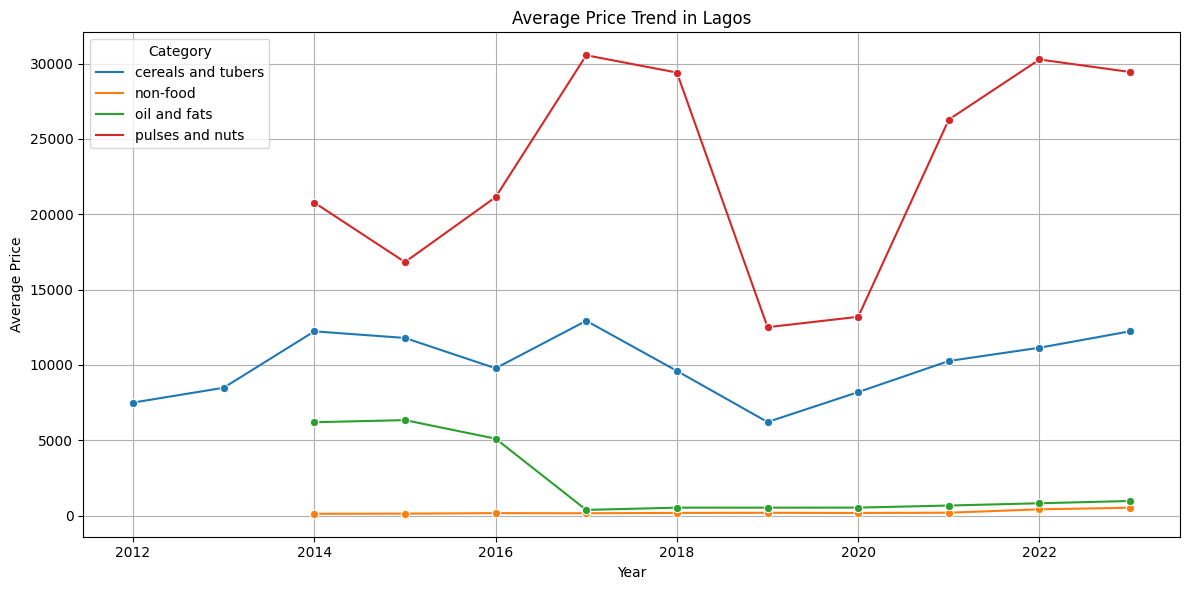

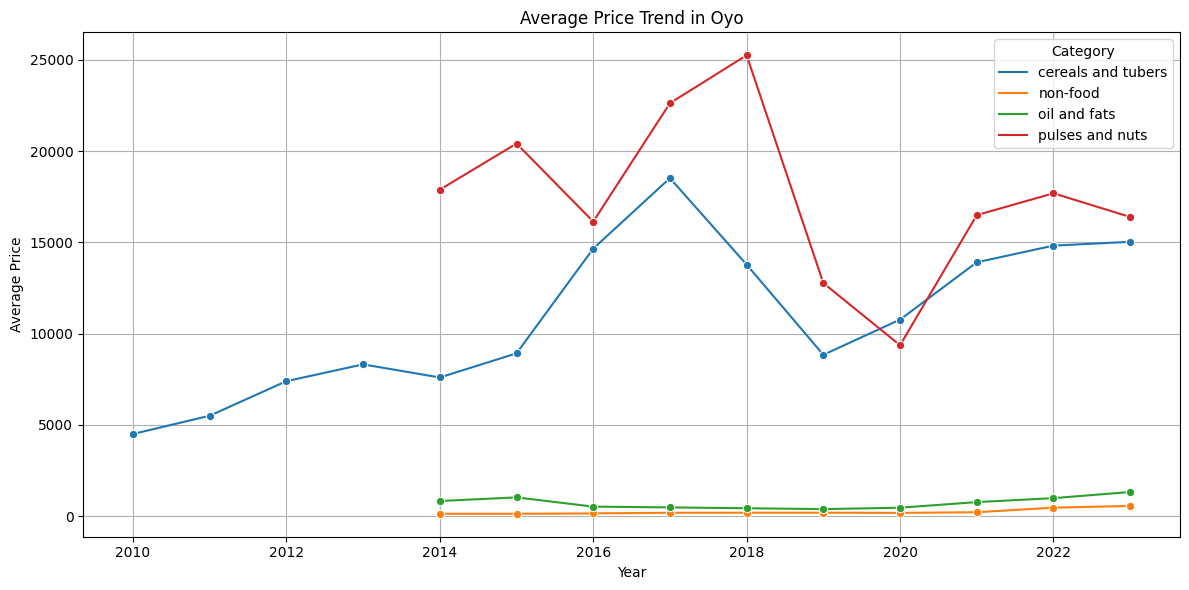

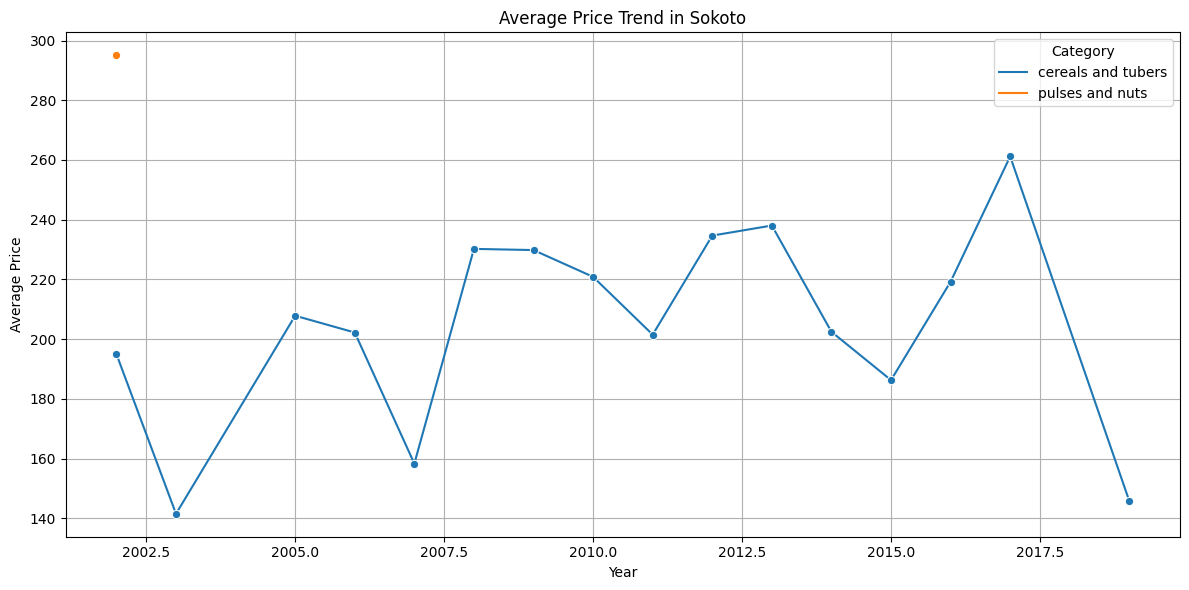

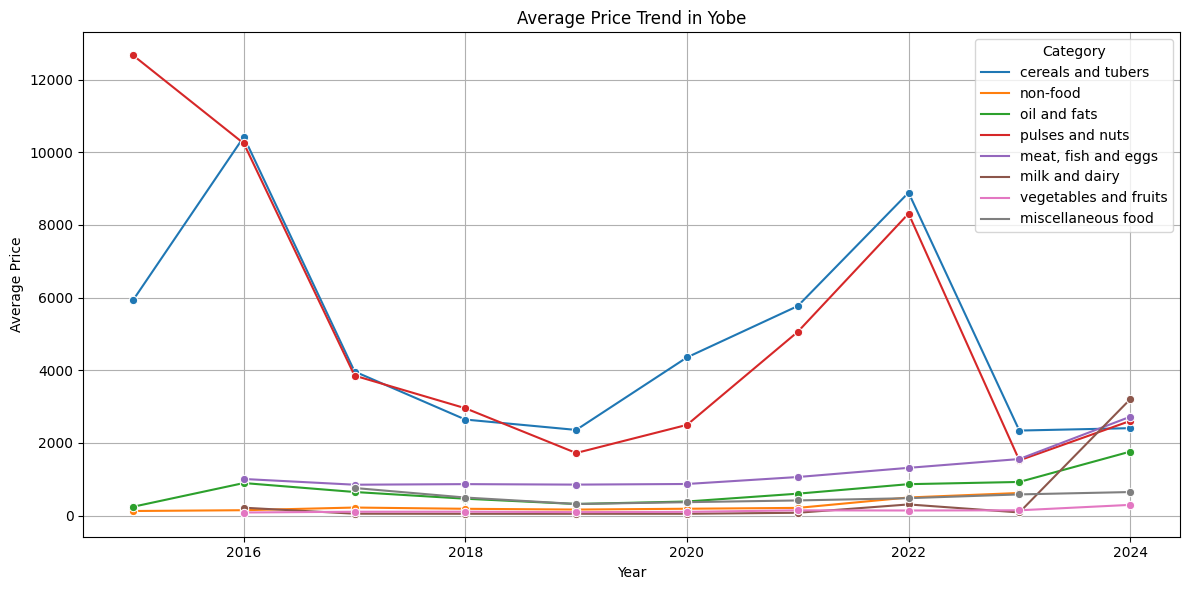

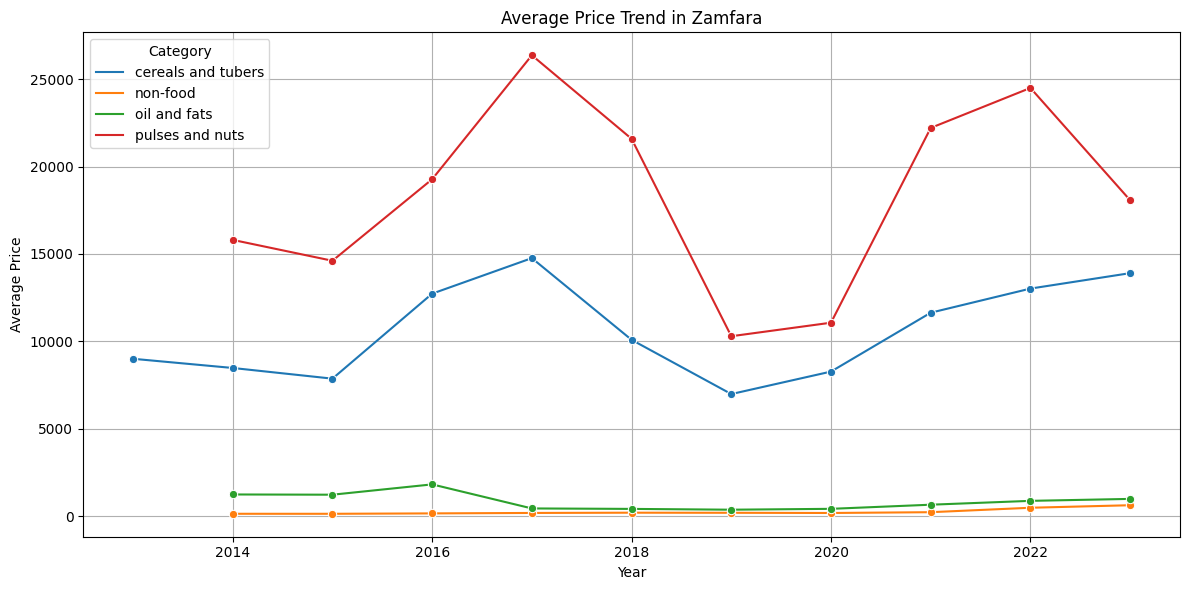

In [7]:
plt.figure(figsize=(12, 6))


for state in category_avg_price_df['state'].unique():
    state_df = category_avg_price_df[category_avg_price_df['state'] == state]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=state_df, x='year', y='avgprice', hue='category', marker='o')
    
    plt.title(f'Average Price Trend in {state}')
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.legend(title='Category')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

`Seasonal Trends`

In [8]:
df['month'] = df['date'].dt.month
seasonal_trends = df.groupby(['year', 'month']).agg(avgprice=('price', 'mean')).reset_index()

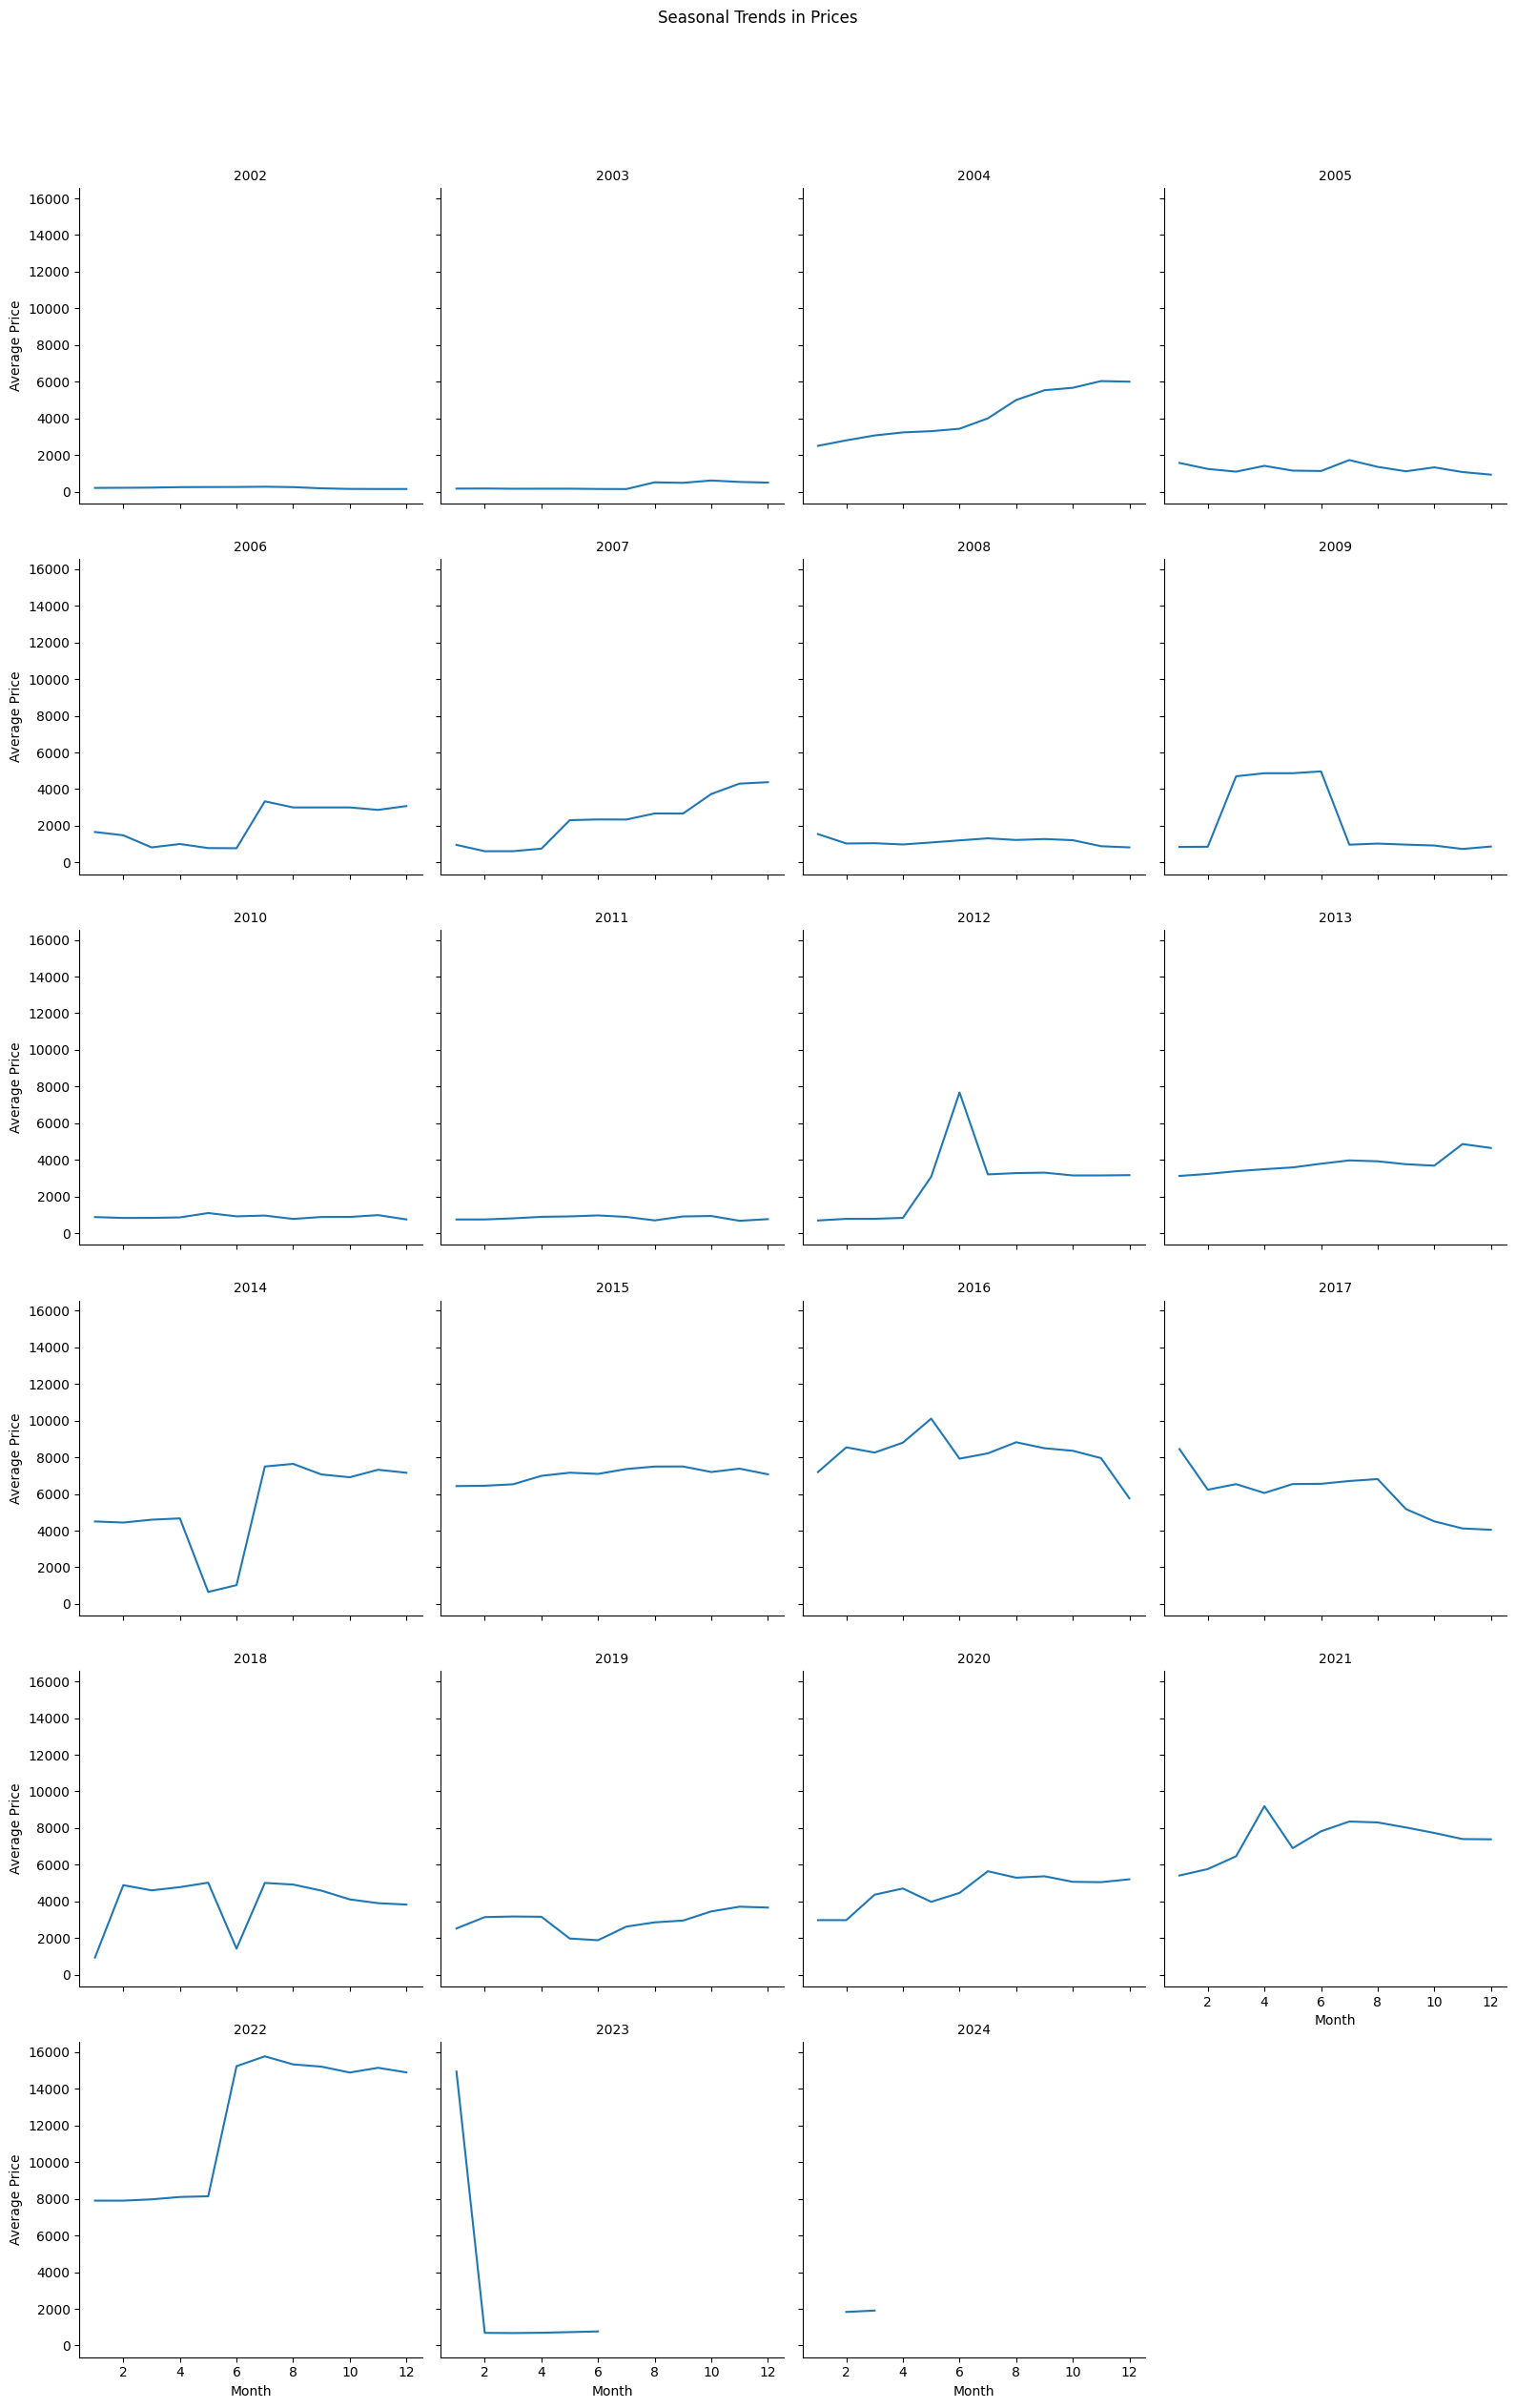

In [9]:
g = sns.FacetGrid(seasonal_trends, col="year", col_wrap=4, height=4)
g.map(sns.lineplot, "month", "avgprice", palette='tab20')
g.set_axis_labels("Month", "Average Price")
g.set_titles("{col_name}")
g.fig.suptitle('Seasonal Trends in Prices', y=1.05)
plt.tight_layout()
plt.show()

In [10]:
warnings.filterwarnings("default", message="Ignoring `palette` because no `hue` variable has been assigned.")

`Predictive analysis (Rolling Average)`

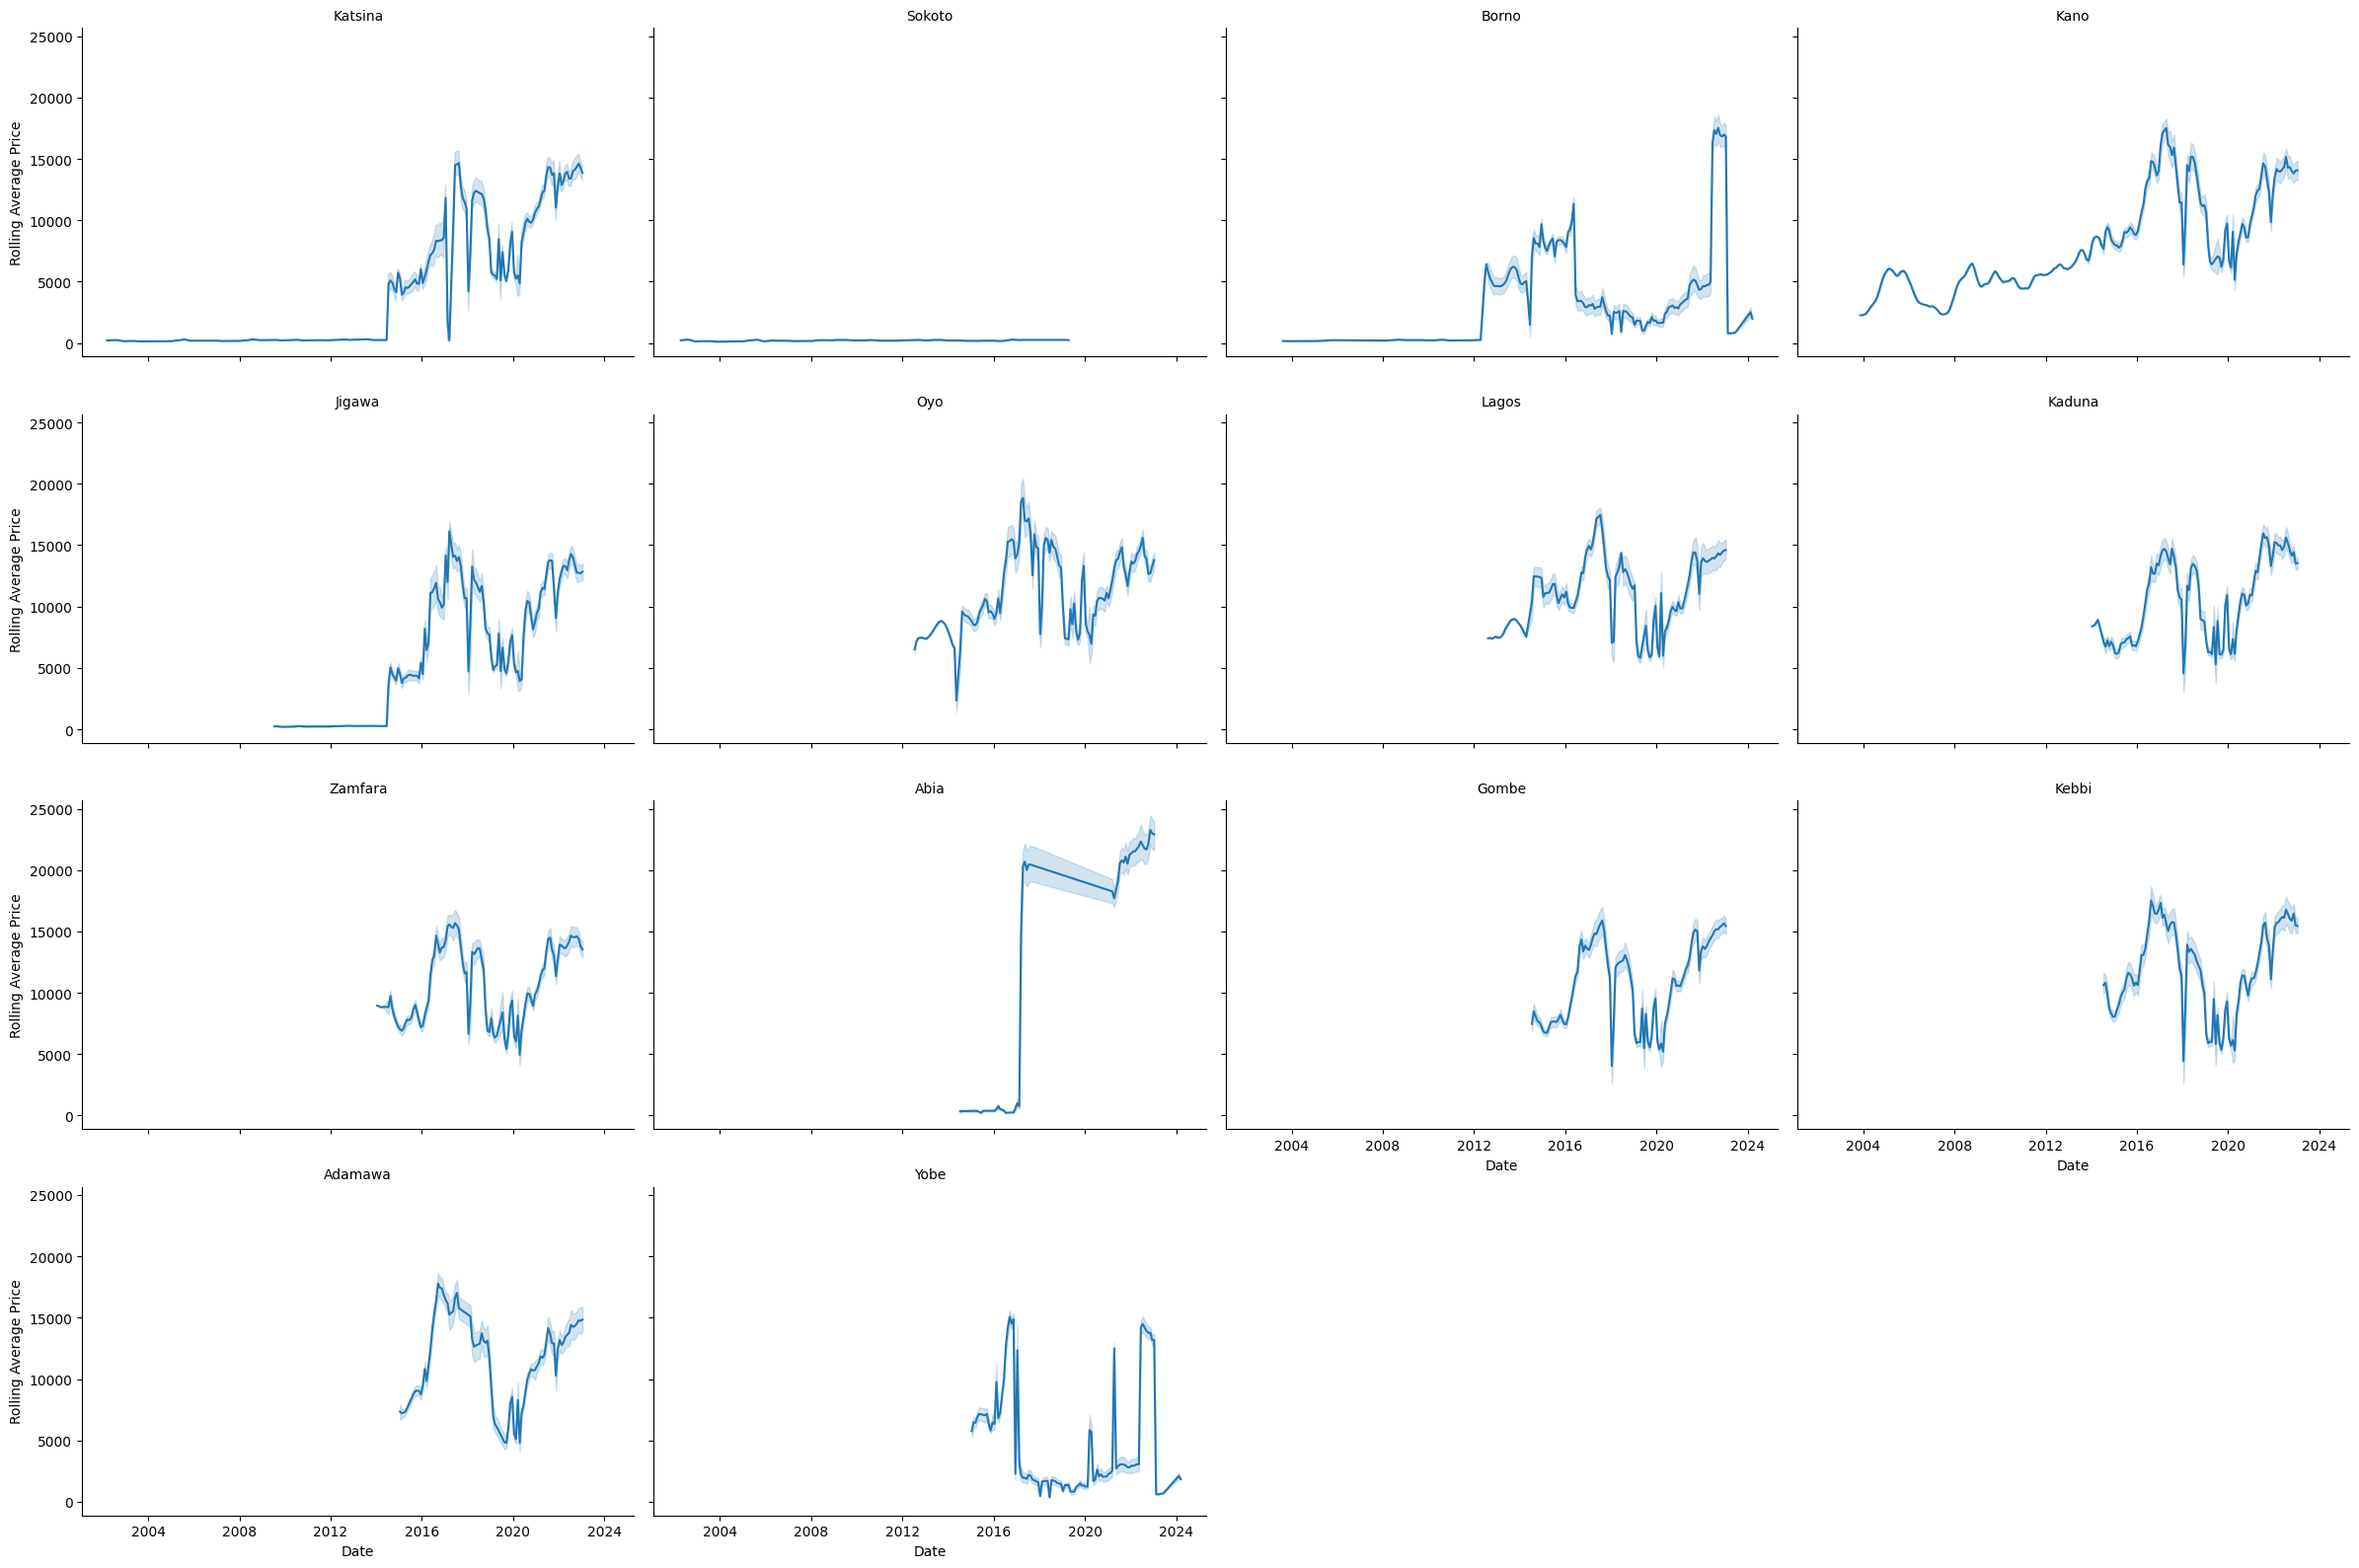

In [11]:
df['rolling_avg_price'] = df.groupby('state')['price'].transform(lambda x: x.rolling(window=12).mean())

g = sns.FacetGrid(df, col="state", col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, "date", "rolling_avg_price")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Date", "Rolling Average Price")
plt.tight_layout()
plt.show()

`Combining Avergae Prices for each State`

In [12]:
merged_df = df.groupby(['year', 'state']).agg(avgprice=('price', 'mean'), avgusdprice=('usdprice', 'mean')).reset_index()
merged_df

,year,state,avgprice,avgusdprice
0,2002,Katsina,200.698143,1.657574
1,2002,Sokoto,213.500370,1.776381
2,2003,Borno,161.450625,1.248787
3,2003,Kano,2266.666667,17.052807
4,2003,Katsina,148.689882,1.146582
...,...,...,...,...
183,2023,Oyo,13794.084828,29.939900
184,2023,Yobe,1233.537803,2.605621
185,2023,Zamfara,13419.248667,29.126327
186,2024,Borno,1937.730487,1.235577


`Save Filtered Data`

In [13]:
df_2023 = merged_df[merged_df['year'] == 2023]


df_2023_filtered = df_2023[['state', 'avgprice', 'avgusdprice']]
df_2023_filtered

,state,avgprice,avgusdprice
173,Abia,22896.413000,49.696400
174,Adamawa,14853.899000,32.240210
175,Borno,2000.147376,4.258219
176,Gombe,15349.993333,33.316980
177,Jigawa,12943.961154,28.094715
178,Kaduna,13489.841818,29.279536
179,Kano,14101.967586,30.608159
180,Katsina,13905.396429,30.181500
181,Kebbi,15475.035000,33.588380
182,Lagos,14598.088966,31.684972


In [14]:
# Save the DataFrame to a CSV file
file_path = 'data/avg_prices_2023.csv'
df_2023_filtered.to_csv(file_path, index=False)

print(f"CSV file saved successfully at '{file_path}'")

CSV file saved successfully at 'data/avg_prices_2023.csv'
